# Weather data analysis

In this playground notebook I will explore some data analysis strategies through the weather data of the City of Curitiba, Brazil. 

## Index
* <a href="#sec1">1. Introduction</a>  
    * <a href="#sec1.1">1.1 Initial statements</a>
    * <a href="#sec1.2">1.2 Loading data</a>

### References (it must be moved down to the end of the file)
1) https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea  
2) https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html  
3) https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

<a id='intro'></a>
## 1. Introduction

<a id='sec1.1'></a>
### 1.1. Initial statements

In [3]:
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='sec1.2'></a>
### 1.2. Loading data

In [59]:
data = pd.read_csv('Station_83842.csv',sep=';')

In [60]:
data.head()

,Estacao,Data,Hora,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade,Unnamed: 10
0,83842,01/01/2000,0,19.7,19.1,94,905.2,9.0,1.8,0.0,NaN
1,83842,01/01/2000,1200,19.0,18.3,93,906.3,9.0,2.6,10.0,NaN
2,83842,01/01/2000,1800,20.3,17.9,77,907.4,14.0,3.3,10.0,NaN
3,83842,02/01/2000,0,17.2,17.0,97,905.6,14.0,3.5,10.0,NaN
4,83842,02/01/2000,1200,18.8,17.6,88,907.0,9.0,3.5,8.0,NaN


In [61]:
data.columns

Index(['Estacao', 'Data', 'Hora', 'TempBulboSeco', 'TempBulboUmido',
       'UmidadeRelativa', 'PressaoAtmEstacao', 'DirecaoVento',
       'VelocidadeVento', 'Nebulosidade', 'Unnamed: 10'],
      dtype='object')

In [62]:
## There're data from only one station:
data.Estacao.unique()

array([83842])

The first and the last columns are useless, since data come from only one station. The last column is due to a final ';' in the end of each line.

In [63]:
newColumns = list(data.columns)[1:-1]

In [64]:
data = data[newColumns]

In [65]:
data.head()

,Data,Hora,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade
0,01/01/2000,0,19.7,19.1,94,905.2,9.0,1.8,0.0
1,01/01/2000,1200,19.0,18.3,93,906.3,9.0,2.6,10.0
2,01/01/2000,1800,20.3,17.9,77,907.4,14.0,3.3,10.0
3,02/01/2000,0,17.2,17.0,97,905.6,14.0,3.5,10.0
4,02/01/2000,1200,18.8,17.6,88,907.0,9.0,3.5,8.0


### Adjusting the datetime type:

In [66]:
data.dtypes

Data                  object
Hora                   int64
TempBulboSeco        float64
TempBulboUmido       float64
UmidadeRelativa        int64
PressaoAtmEstacao    float64
DirecaoVento         float64
VelocidadeVento      float64
Nebulosidade         float64
dtype: object

In [67]:
data['Data'] = data['Data'].astype('datetime64')

In [68]:
## Checking the new data type for Date:
data.dtypes

Data                 datetime64[ns]
Hora                          int64
TempBulboSeco               float64
TempBulboUmido              float64
UmidadeRelativa               int64
PressaoAtmEstacao           float64
DirecaoVento                float64
VelocidadeVento             float64
Nebulosidade                float64
dtype: object

### Adjusting the hour type:

In [69]:
data.Hora.unique()

array([   0, 1200, 1800])

There's only three measurement periods in the dataset: 12am, 12pm and 6pm. Let's convert it to the 24:00 hour format. To make things easier, I'll first divide them by 100, then converting to hour format.

In [70]:
## Converting the four digits hour data to a two digits one:
data['Hora'] = (data['Hora']/100).astype('int')

In [75]:
## Converting to time type:
data['Hora'] = data['Hora'].astype('timedelta64[h]')

In [76]:
data.head()

,Data,Hora,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade
0,2000-01-01,00:00:00,19.7,19.1,94,905.2,9.0,1.8,0.0
1,2000-01-01,12:00:00,19.0,18.3,93,906.3,9.0,2.6,10.0
2,2000-01-01,18:00:00,20.3,17.9,77,907.4,14.0,3.3,10.0
3,2000-02-01,00:00:00,17.2,17.0,97,905.6,14.0,3.5,10.0
4,2000-02-01,12:00:00,18.8,17.6,88,907.0,9.0,3.5,8.0


### Turning it a time-series dataset:

In [77]:
## Backing up the dataset:
rawData = data.copy()

In [90]:
data = rawData.copy()

In [78]:
## Changing the index:
data = data.set_index('Data')

In [91]:
data

,Data,Hora,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade
0,2000-01-01,00:00:00,19.7,19.1,94,905.2,9.0,1.8,0.0
1,2000-01-01,12:00:00,19.0,18.3,93,906.3,9.0,2.6,10.0
2,2000-01-01,18:00:00,20.3,17.9,77,907.4,14.0,3.3,10.0
3,2000-02-01,00:00:00,17.2,17.0,97,905.6,14.0,3.5,10.0
4,2000-02-01,12:00:00,18.8,17.6,88,907.0,9.0,3.5,8.0
...,...,...,...,...,...,...,...,...,...
21192,2019-12-28,12:00:00,20.8,17.9,75,915.5,NaN,NaN,8.0
21193,2019-12-29,00:00:00,21.4,19.6,85,913.0,NaN,NaN,9.0
21194,2019-12-30,12:00:00,21.6,18.1,71,912.3,NaN,NaN,9.0
21195,2019-12-31,00:00:00,21.8,20.0,85,909.2,NaN,NaN,9.0


In [92]:
data['timestamp'] = data['Data'] + data['Hora']

In [93]:
data.head(2)

,Data,Hora,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade,timestamp
0,2000-01-01,00:00:00,19.7,19.1,94,905.2,9.0,1.8,0.0,2000-01-01 00:00:00
1,2000-01-01,12:00:00,19.0,18.3,93,906.3,9.0,2.6,10.0,2000-01-01 12:00:00


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21197 entries, 0 to 21196
Data columns (total 10 columns):
Data                 21197 non-null datetime64[ns]
Hora                 21197 non-null timedelta64[ns]
TempBulboSeco        21190 non-null float64
TempBulboUmido       21189 non-null float64
UmidadeRelativa      21197 non-null int64
PressaoAtmEstacao    20406 non-null float64
DirecaoVento         20171 non-null float64
VelocidadeVento      20165 non-null float64
Nebulosidade         21194 non-null float64
timestamp            21197 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(6), int64(1), timedelta64[ns](1)
memory usage: 1.6 MB


In [95]:
data = data.set_index('timestamp')

In [96]:
data.head()

,Data,Hora,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade
timestamp,,,,,,,,,
2000-01-01 00:00:00,2000-01-01,00:00:00,19.7,19.1,94,905.2,9.0,1.8,0.0
2000-01-01 12:00:00,2000-01-01,12:00:00,19.0,18.3,93,906.3,9.0,2.6,10.0
2000-01-01 18:00:00,2000-01-01,18:00:00,20.3,17.9,77,907.4,14.0,3.3,10.0
2000-02-01 00:00:00,2000-02-01,00:00:00,17.2,17.0,97,905.6,14.0,3.5,10.0
2000-02-01 12:00:00,2000-02-01,12:00:00,18.8,17.6,88,907.0,9.0,3.5,8.0


### Resampling by day:

In [99]:
### Selecting data between certain dates from the dataset (ref[1])
data['2018-01-04':'2018-01-06']

,Data,Hora,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade
timestamp,,,,,,,,,
2018-01-04 00:00:00,2018-01-04,00:00:00,20.8,19.4,87,909.0,36.0,0.8,10.0
2018-01-04 12:00:00,2018-01-04,12:00:00,21.5,20.0,87,910.7,27.0,3.6,10.0
2018-01-04 18:00:00,2018-01-04,18:00:00,24.7,20.2,66,907.9,23.0,4.5,9.0
2018-01-05 00:00:00,2018-01-05,00:00:00,22.8,17.2,56,914.4,23.0,1.1,0.0
2018-01-05 12:00:00,2018-01-05,12:00:00,19.9,18.6,88,916.4,5.0,1.6,9.0
2018-01-05 18:00:00,2018-01-05,18:00:00,27.2,19.8,50,916.2,27.0,3.3,9.0
2018-01-06 00:00:00,2018-01-06,00:00:00,15.6,12.9,73,912.6,32.0,1.0,0.0


In [101]:
## Resampling for mean, max, and min, of each day:
dataAvg = data.resample('D').mean()
dataMax = data.resample('D').max()
dataMin = data.resample('D').min()

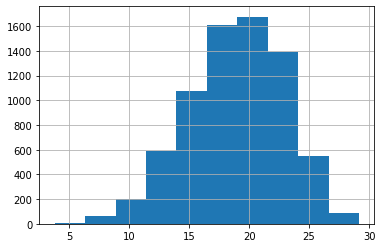

In [103]:
dataAvg['TempBulboSeco'].hist()